# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Juan Sebastian Novoa Ortiz

Identificación: 11229292434

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [58]:
# definamos la funcion para el metodo de ridder
def ridder(a, b, f, tol, maxiter = 1000):
  '''
  Se define la funcion del metodo de ridder

  Le entra:

  a : extremo intervalo izquierdo
  b : extremo intervalo derecho
  f : funcion definida
  tole : tolerancia deseada para la precision de la raiz
  maxiter : maximo de iteraciones que hace el programa

  Entrega:

  fx : Entrega la raiz
  i: la iteracion en la que termino y hayo la raiz de acuerdo a la tolerancia

  '''

  lista_candidatos_raices = []
  for i in range(maxiter + 1):
    # Definimos las variables a usar
    m = (a + b)/2
    fa = f(a)
    fb = f(b)
    if fa * fb > 0: # Verificamos que la funcion tiene signos opuestos en el intervalo definido
      raise ValueError("El intervalo definido no posee signos opuestos")

    else:
      fm = f(m)
      s = (fm**2 - (fa*fb))**(1/2)

      # Verificamos que s sea diferente de 0
      if s == 0:
        raise ValueError("S es igual a 0 el metodo no puede continuar")

      else:
        x = m + (((m-a)) * (fm) / (s)) * np.sign(fa-fb) # Definimos la nueva funcion x para el candidato de la funcion
        fx = f(x)
        lista_candidatos_raices.append(fx) # Añadimos el candidato de raiz a la lista
          # Se verifica si la nueva raiz ya es menor a la tolerancia
        if abs(fx) < tol:
          return x, i # Se retorna la raiz y el numero de iteraciones

        # Definimos la primera condicion y en caso de cierta se cambia a = m y b = x para repetir el proceso
        elif fm * fx < 0:
          a = m
          b = x

        # Definimos la segunda condicion y en caso de cierta se cambia b = x
        elif fa * fx < 0:
          b = x

        # Definimos la segunda condicion y en caso de cierta se cambia a = x
        elif fb * fx < 0:
          a = x

  raise RuntimeError("no convergio en maxiter")

In [63]:
# definicion de f(x) = cos(x) - x
f = lambda x: np.cos(x) - x
# Se halla la raiz el numero de iteraciones y una lista de como se comporto la raiz al actualizar a la siguiente iteracion
raiz, numero_iteraciones  = ridder(-1, 1, f, 1e-10)

print(f'La raiz de f es {raiz} y se hallo en {numero_iteraciones+1} iteraciones.')


La raiz de f es 0.7390851332170026 y se hallo en 5 iteraciones.


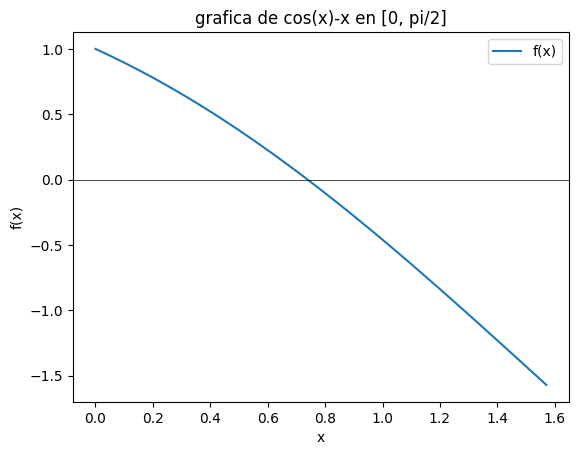

In [78]:
# grafica de f en [0, pi/2]
x = np.linspace(0, np.pi/2, 100) # Se generan los valores de x a graficar
y_vals = f(x) # Se hallan los y evaluando los x en la f definida

# Codigo de graficacion
plt.figure()
plt.plot(x, y_vals, label='f(x)')
plt.axhline(0, color='k', lw=0.5) # Linea de corte horizontal
plt.xlabel('x'); plt.ylabel('f(x)') # Nombres ejes
plt.title('grafica de cos(x)-x en [0, pi/2]')
plt.legend()
plt.show()

In [77]:
# Encontrar la raiz con dataframe
df = pd.DataFrame({'x' : x, 'f(x)' : f(x)})
# codigo para los valores cercanos
print(df[(df['f(x)'] < 0.1) & (df['f(x)'] > -0.1)])

           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


In [72]:
# raiz con ridder propio
xr, ir = ridder(0, np.pi/2, f, tol=1e-6)
# raiz con biseccion de scipy
rb = root_scalar(f, bracket=[0, np.pi/2], method='bisect', xtol=1e-6)
xb, ib = rb.root, rb.iterations
# raiz con secante de scipy
rs = root_scalar(f, x0=0.5, x1=1.0, method='secant')
xs, isec = rs.root, rs.iterations

print(f"ridder         :  raiz = {xr:.8f}, iter = {ir}")
print(f"biseccion      :  raiz = {xb:.8f}, iter = {ib}")
print(f"secante        :  raiz = {xs:.8f}, iter = {isec}")

ridder         :  raiz = 0.73908489, iter = 1
biseccion      :  raiz = 0.73908588, iter = 21
secante        :  raiz = 0.73908513, iter = 5


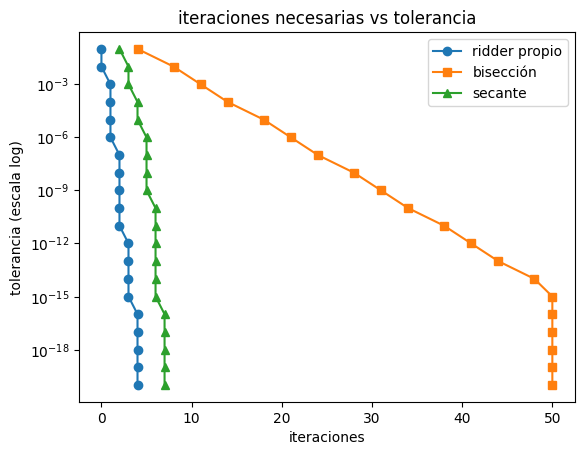

In [69]:
# análisis de iteraciones vs tolerancia
tol = np.logspace(-1, -20, 20)
# se crean listas donde se almacenan la iterancias
it_r = []
it_b = []
it_s = []

for t in tol:
    # llama a ridder y coge sólo el nº de iteraciones (índice 1), evita el duplicado de enviar la lista completa varias veces
    # Al tomar un par tomamos el segundo que es el numero de iteraciones
    nr = ridder(0, np.pi/2, f, t)[1]
    it_r.append(nr)

    # bisección con xtol = t
    rb = root_scalar(f, bracket=[0, np.pi/2], method='bisect', xtol=t)
    it_b.append(rb.iterations) # Se adjunta el numero de iteraciones que uso el root scalar

    # secante con xtol = t
    rs = root_scalar(f, x0=0.5, x1=1.0, method='secant', xtol=t)
    it_s.append(rs.iterations) # Se adjunta el numero de iteraciones que uso el root scalar

# gráfico semilog
plt.figure()
plt.semilogy(it_r, tol, '-o', label='ridder propio')
plt.semilogy(it_b, tol, '-s', label='bisección')
plt.semilogy(it_s, tol, '-^', label='secante')
plt.xlabel('iteraciones')
plt.ylabel('tolerancia (escala log)')
plt.title('iteraciones necesarias vs tolerancia')
plt.legend()
plt.show()


#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





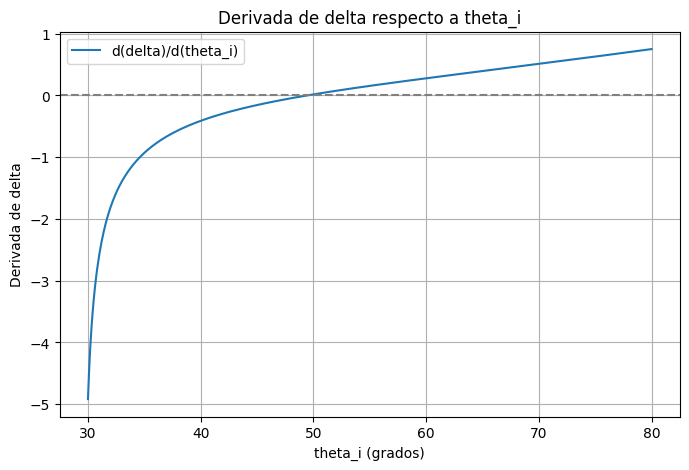

Minimo de desviacion segun Newton-Raphson (sin derivada): 49.46419788868343 grados
Minimo de desviacion segun metodo de la secante: 49.464197888683444 grados
Angulo critico para reflexion interna total: 29.430187205798575 grados


In [2]:
# Constantes del problema
n = 1.52                # Indice de refraccion del prisma (vidrio crown)
A = np.radians(60)      # Angulo del prisma en radianes

# Funcion para calcular theta_r, el angulo de refraccion en la primera interfaz
def calcular_theta_r(theta_i):
    # theta_i debe estar en radianes
    # Retorna theta_r en radianes
    return np.arcsin(np.sin(theta_i) / n)

# Funcion que calcula la derivada de delta con respecto a theta_i
def derivada_delta(theta_i):
    # theta_i es el angulo de incidencia en radianes
    # Retorna el valor de la derivada de delta respecto a theta_i

    theta_r = calcular_theta_r(theta_i)  # Se calcula el angulo de refraccion
    angulo_interno = A - theta_r         # Angulo dentro del prisma

    # Numerador y denominador de la expresion derivada
    numerador = np.cos(theta_i) * np.cos(angulo_interno)
    denominador = np.cos(theta_r) * np.sqrt(1 - n**2 * (np.sin(angulo_interno))**2)

    return 1 - numerador / denominador

# Parte A: Graficar la derivada de delta y encontrar su cero (minimo de delta)

# Crear un arreglo de valores de theta_i entre 30 y 80 grados en radianes
theta_i_grados = np.linspace(30, 80, 500)
theta_i_radianes = np.radians(theta_i_grados)

# Evaluar la derivada para cada valor de theta_i
valores_derivada = [derivada_delta(theta) for theta in theta_i_radianes]

# Graficar la derivada
plt.figure(figsize=(8,5))
plt.plot(theta_i_grados, valores_derivada, label='d(delta)/d(theta_i)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('theta_i (grados)')
plt.ylabel('Derivada de delta')
plt.title('Derivada de delta respecto a theta_i')
plt.legend()
plt.grid(True)
plt.show()

# Funcion auxiliar para usar en los metodos de raices
# Queremos encontrar donde la derivada es cero (minimo)
def funcion_para_raices(theta_i):
    return derivada_delta(theta_i)

# Metodo de Newton-Raphson sin derivada (usa secante internamente)
solucion_newton = root_scalar(funcion_para_raices, method='newton', x0=np.radians(50), x1=np.radians(60))
theta_min_newton = np.degrees(solucion_newton.root)  # Convertimos a grados

# Metodo de la secante
solucion_secante = root_scalar(funcion_para_raices, method='secant', x0=np.radians(50), x1=np.radians(60))
theta_min_secante = np.degrees(solucion_secante.root)

print("Minimo de desviacion segun Newton-Raphson (sin derivada):", theta_min_newton, "grados")
print("Minimo de desviacion segun metodo de la secante:", theta_min_secante, "grados")

# Parte B: Calcular el angulo critico donde ocurre reflexion interna total

# Funcion que representa la condicion para reflexion interna total
def condicion_reflexion_total(theta_i):
    # Queremos que sin(A - theta_r) - 1/n = 0
    theta_r = calcular_theta_r(theta_i)
    return np.sin(A - theta_r) - 1/n

# Buscamos solucion en un intervalo razonable. A simple vista, de 10 a 50 grados parece adecuado
solucion_biseccion = root_scalar(condicion_reflexion_total, method='bisect', bracket=[np.radians(10), np.radians(50)])
theta_critico = np.degrees(solucion_biseccion.root)

print("Angulo critico para reflexion interna total:", theta_critico, "grados")
